# Clean and Analyze Employee Exit Surveys


In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
print(f'\033[1mNumber of rows:\033[0m\t\t  {dete_survey.shape[0]:,}'
      f'\n\033[1mNumber of columns:\033[0m \t  {dete_survey.shape[1]:,}'
      f'\n\033[1mNumber of missing values:\033[0m {dete_survey.isnull().sum().sum()}'
      f'\n\n\033[1mCOLUMN NAMES:\033[0m \n{dete_survey.columns.to_list()}'
      f'\n\n\033[1mDATA TYPES:\033[0m \n{dete_survey.dtypes}')

Number of rows:		  822
Number of columns: 	  56
Number of missing values: 5984

COLUMN NAMES: 
['ID', 'SeparationType', 'Cease Date', 'DETE Start Date', 'Role Start Date', 'Position', 'Classification', 'Region', 'Business Unit', 'Employment Status', 'Career move to public sector', 'Career move to private sector', 'Interpersonal conflicts', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Work location', 'Employment conditions', 'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health', 'Traumatic incident', 'Work life balance', 'Workload', 'None of the above', 'Professional Development', 'Opportunities for promotion', 'Staff morale', 'Workplace issue', 'Physical environment', 'Worklife balance', 'Stress and pressure support', 'Performance of supervisor', 'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations', 'Feedback', 'Further PD', 'Communication', 'My say', 'Information', '

In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey['SeparationType'].value_counts(dropna=False,normalize=True)

Age Retirement                          0.346715
Resignation-Other reasons               0.182482
Resignation-Other employer              0.110706
Resignation-Move overseas/interstate    0.085158
Voluntary Early Retirement (VER)        0.081509
Ill Health Retirement                   0.074209
Other                                   0.059611
Contract Expired                        0.041363
Termination                             0.018248
Name: SeparationType, dtype: float64

In [6]:
print(f'\033[1mNumber of rows:\033[0m\t\t  {tafe_survey.shape[0]:,}'
      f'\n\033[1mNumber of columns:\033[0m \t  {tafe_survey.shape[1]:,}'
      f'\n\033[1mNumber of missing values:\033[0m {tafe_survey.isnull().sum().sum()}'
      f'\n\n\033[1mCOLUMN NAMES:\033[0m \n{tafe_survey.columns.to_list()}'
      f'\n\n\033[1mDATA TYPES:\033[0m \n{tafe_survey.dtypes}')

Number of rows:		  702
Number of columns: 	  72
Number of missing values: 9973

COLUMN NAMES: 
['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR', 'Reason for ceasing employment', 'Contributing Factors. Career Move - Public Sector ', 'Contributing Factors. Career Move - Private Sector ', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict', 'Contributing Factors. Study', 'Contributing Factors. Travel', 'Contributing Factors. Other', 'Contributing Factors. NONE', 'Main Factor. Which of these was the main factor for leaving?', 'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction', 'InstituteViews. Topic:2. I was given access to skills training to help me do my job better', 'InstituteViews. Topic:3. I was given adequate opportunities for pe

In [7]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna=False,normalize=True)

Resignation                 0.484330
Contract Expired            0.180912
Retrenchment/ Redundancy    0.148148
Retirement                  0.116809
Transfer                    0.035613
Termination                 0.032764
NaN                         0.001425
Name: Reason for ceasing employment, dtype: float64

## Identify Missing Values and Drop Unneccessary Columns


In [10]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [11]:
print(f'\033[1mNumber of rows:\033[0m\t\t  {dete_survey_updated.shape[0]:,}'
      f'\n\033[1mNumber of columns:\033[0m \t  {dete_survey_updated.shape[1]:,}'
      f'\n\033[1mNumber of missing values:\033[0m {dete_survey_updated.isnull().sum().sum()}'
      f'\n\n\033[1mCOLUMN NAMES:\033[0m \n{dete_survey_updated.columns.to_list()}'
      f'\n\n\033[1mDATA TYPES:\033[0m \n{dete_survey_updated.dtypes}')

Number of rows:		  822
Number of columns: 	  35
Number of missing values: 5447

COLUMN NAMES: 
['ID', 'SeparationType', 'Cease Date', 'DETE Start Date', 'Role Start Date', 'Position', 'Classification', 'Region', 'Business Unit', 'Employment Status', 'Career move to public sector', 'Career move to private sector', 'Interpersonal conflicts', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Work location', 'Employment conditions', 'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health', 'Traumatic incident', 'Work life balance', 'Workload', 'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait', 'South Sea', 'Disability', 'NESB']

DATA TYPES: 
ID                                       int64
SeparationType                          object
Cease Date                              object
DETE Start Date                        float64
Role Start Date                        float64
Positi

In [12]:
print(f'\033[1mNumber of rows:\033[0m\t\t  {tafe_survey_updated.shape[0]:,}'
      f'\n\033[1mNumber of columns:\033[0m \t  {tafe_survey_updated.shape[1]:,}'
      f'\n\033[1mNumber of missing values:\033[0m {tafe_survey_updated.isnull().sum().sum()}'
      f'\n\n\033[1mCOLUMN NAMES:\033[0m \n{tafe_survey_updated.columns.to_list()}'
      f'\n\n\033[1mDATA TYPES:\033[0m \n{tafe_survey_updated.dtypes}')

Number of rows:		  702
Number of columns: 	  23
Number of missing values: 3824

COLUMN NAMES: 
['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR', 'Reason for ceasing employment', 'Contributing Factors. Career Move - Public Sector ', 'Contributing Factors. Career Move - Private Sector ', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict', 'Contributing Factors. Study', 'Contributing Factors. Travel', 'Contributing Factors. Other', 'Contributing Factors. NONE', 'Gender. What is your Gender?', 'CurrentAge. Current Age', 'Employment Type. Employment Type', 'Classification. Classification', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)', 'LengthofServiceCurrent. Length of Service at current workplace (in years)']

DATA TYPES: 
Record ID         

## Rename Columns

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace('\s+','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
tafe_survey_new_columns = {'Record ID':'id',
                          'CESSATION YEAR':'cease_date',
                          'Reason for ceasing employment':'separationtype',
                          'Gender. What is your Gender?':'gender',
                          'CurrentAge. Current Age':'age',
                          'Employment Type. Employment Type':'employment_status',
                          'Classification. Classification':'position',
                          'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                          'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'
                          }

tafe_survey_updated = tafe_survey_updated.rename(tafe_survey_new_columns,axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the Data


In [15]:
tafe_survey_updated['separationtype'].value_counts(dropna=False,normalize=True)

Resignation                 0.484330
Contract Expired            0.180912
Retrenchment/ Redundancy    0.148148
Retirement                  0.116809
Transfer                    0.035613
Termination                 0.032764
NaN                         0.001425
Name: separationtype, dtype: float64

In [16]:
dete_survey_updated['separationtype'].value_counts(dropna=False,normalize=True)

Age Retirement                          0.346715
Resignation-Other reasons               0.182482
Resignation-Other employer              0.110706
Resignation-Move overseas/interstate    0.085158
Voluntary Early Retirement (VER)        0.081509
Ill Health Retirement                   0.074209
Other                                   0.059611
Contract Expired                        0.041363
Termination                             0.018248
Name: separationtype, dtype: float64

In [17]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

In [18]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

## Verify the Data


In [19]:
dete_resignations['cease_date'].value_counts(dropna=False,normalize=True)

2012       0.405145
2013       0.237942
01/2014    0.070740
12/2013    0.054662
06/2013    0.045016
09/2013    0.035370
NaN        0.035370
07/2013    0.028939
11/2013    0.028939
10/2013    0.019293
08/2013    0.012862
05/2012    0.006431
05/2013    0.006431
2010       0.003215
07/2006    0.003215
07/2012    0.003215
09/2010    0.003215
Name: cease_date, dtype: float64

In [20]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [21]:
dete_resignations['cease_date'].value_counts(dropna=False,normalize=True)

2013.0    0.469453
2012.0    0.414791
2014.0    0.070740
NaN       0.035370
2010.0    0.006431
2006.0    0.003215
Name: cease_date, dtype: float64

In [22]:
dete_resignations['dete_start_date'].value_counts(dropna=False,normalize=True).sort_index()

1963.0    0.003215
1971.0    0.003215
1972.0    0.003215
1973.0    0.003215
1974.0    0.006431
1975.0    0.003215
1976.0    0.006431
1977.0    0.003215
1980.0    0.016077
1982.0    0.003215
1983.0    0.006431
1984.0    0.003215
1985.0    0.009646
1986.0    0.009646
1987.0    0.003215
1988.0    0.012862
1989.0    0.012862
1990.0    0.016077
1991.0    0.012862
1992.0    0.019293
1993.0    0.016077
1994.0    0.019293
1995.0    0.012862
1996.0    0.019293
1997.0    0.016077
1998.0    0.019293
1999.0    0.025723
2000.0    0.028939
2001.0    0.009646
2002.0    0.019293
2003.0    0.019293
2004.0    0.045016
2005.0    0.048232
2006.0    0.041801
2007.0    0.067524
2008.0    0.070740
2009.0    0.041801
2010.0    0.054662
2011.0    0.077170
2012.0    0.067524
2013.0    0.032154
NaN       0.090032
Name: dete_start_date, dtype: float64

In [23]:
print(f'\033[1mNumber of rows:\033[0m\t\t  {dete_resignations.shape[0]:,}')

Number of rows:		  311


In [24]:
dete_resignations = dete_resignations.dropna(axis=0,subset=['cease_date','dete_start_date'])
print(f'\033[1mNumber of rows:\033[0m\t\t  {dete_resignations.shape[0]:,}')

Number of rows:		  273


## Create a New Column


In [25]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts(dropna=False,normalize=True).sort_index()

0.0     0.073260
1.0     0.080586
2.0     0.051282
3.0     0.073260
4.0     0.058608
5.0     0.084249
6.0     0.062271
7.0     0.047619
8.0     0.029304
9.0     0.051282
10.0    0.021978
11.0    0.014652
12.0    0.021978
13.0    0.029304
14.0    0.021978
15.0    0.025641
16.0    0.018315
17.0    0.021978
18.0    0.018315
19.0    0.010989
20.0    0.025641
21.0    0.010989
22.0    0.021978
23.0    0.014652
24.0    0.014652
25.0    0.007326
26.0    0.007326
27.0    0.003663
28.0    0.007326
29.0    0.003663
30.0    0.007326
31.0    0.003663
32.0    0.010989
33.0    0.003663
34.0    0.003663
35.0    0.003663
36.0    0.007326
38.0    0.003663
39.0    0.010989
41.0    0.003663
42.0    0.003663
49.0    0.003663
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees


Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

dafe_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

In [26]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False,normalize=True).sort_index()

-                                         0.814706
Contributing Factors. Dissatisfaction     0.161765
NaN                                       0.023529
Name: Contributing Factors. Dissatisfaction, dtype: float64

In [27]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False,normalize=True).sort_index()

-                      0.794118
Job Dissatisfaction    0.182353
NaN                    0.023529
Name: Contributing Factors. Job Dissatisfaction, dtype: float64

In [28]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

#factor = ['Contributing Factors. Dissatisfaction']
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [29]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                       'Contributing Factors. Job Dissatisfaction']].any(1, skipna=False)


In [30]:
tafe_resignations_up = tafe_resignations.copy()

In [31]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',
                                                      'physical_work_environment','lack_of_recognition',
                                                      'lack_of_job_security','work_location',
                                                      'employment_conditions','work_life_balance',
                                                      'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False).sort_index()

False    136
True     137
Name: dissatisfied, dtype: int64

## Combine the data

In [32]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   613 non-null    float64
 1   separationtype                                       613 non-null    object 
 2   cease_date                                           608 non-null    float64
 3   dete_start_date                                      273 non-null    float64
 4   role_start_date                                      263 non-null    float64
 5   position                                             560 non-null    object 
 6   classification                                       146 non-null    object 
 7   region                                               234 non-null    object 
 8   business_unit                                        28 non-null     o

In [33]:
combined.notnull().sum().sort_values()


torres_strait                                            0
south_sea                                                2
aboriginal                                               7
nesb                                                     8
disability                                               8
business_unit                                           28
classification                                         146
region                                                 234
role_start_date                                        263
maternity/family                                       273
relocation                                             273
study/travel                                           273
workload                                               273
traumatic_incident                                     273
employment_conditions                                  273
work_life_balance                                      273
ill_health                                             2

In [34]:
combined_updated = combined.dropna(thresh=500,axis=1).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 613 non-null    float64
 1   separationtype     613 non-null    object 
 2   cease_date         608 non-null    float64
 3   position           560 non-null    object 
 4   employment_status  563 non-null    object 
 5   gender             558 non-null    object 
 6   age                561 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       605 non-null    object 
 9   institute          613 non-null    object 
dtypes: float64(2), object(8)
memory usage: 48.0+ KB


## Clean the Service Column


Next, we'll clean the institute_service column and categorize employees according to the following definitions:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

In [35]:
combined_updated['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
10.0                   6
12.0                   6
14.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


In [40]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('Less than 1 year','0')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('11-20','15')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('1-2','1')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('3-4','3')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('5-6','5')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('7-10','8')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('More than 20 years','20')
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)



In [41]:
combined_updated['institute_service'].value_counts(dropna=False)

0.0     93
1.0     86
3.0     83
5.0     56
NaN     50
15.0    33
8.0     29
20.0    17
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
10.0     6
17.0     6
14.0     6
12.0     6
22.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
21.0     3
19.0     3
32.0     3
39.0     3
25.0     2
30.0     2
36.0     2
26.0     2
28.0     2
27.0     1
42.0     1
41.0     1
35.0     1
38.0     1
49.0     1
31.0     1
29.0     1
34.0     1
33.0     1
Name: institute_service, dtype: int64

In [42]:
def step_career(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val <= 6:
        return 'Experienced'
    elif val >= 7 and val <= 10:
        return 'Established'
    else: 
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(step_career)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
Established     62
NaN             50
Name: service_cat, dtype: int64

## Perform Some Initial Analysis


In [43]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    377
True     228
NaN        8
Name: dissatisfied, dtype: int64

In [44]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    385
True     228
Name: dissatisfied, dtype: int64

In [48]:
service_cat_groupby = combined_updated.groupby('service_cat')['dissatisfied'].mean()
print(service_cat_groupby)

service_cat
Established    0.516129
Experienced    0.343023
New            0.295337
Veteran        0.485294
Name: dissatisfied, dtype: float64


In [61]:
service_cat_pivot = pd.pivot_table(combined_updated, index='service_cat',values='dissatisfied')
print(service_cat_pivot)

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


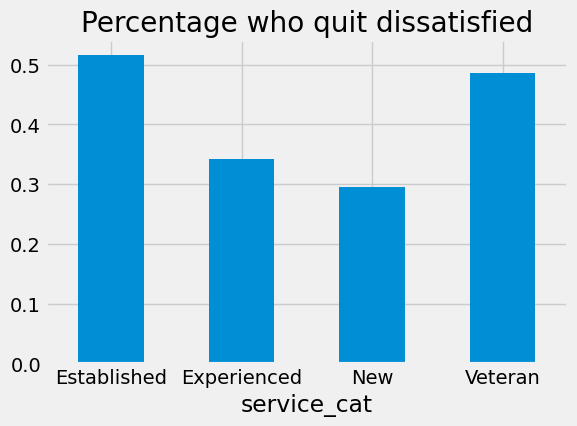

In [66]:
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

service_cat_groupby.plot(kind='bar', title='Percentage who quit dissatisfied', rot=0)
plt.show()

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

Our work here is far from done! We recommend that you continue with the following steps:

- Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
- Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
- Format your project using Dataquest's [project style guide](https://www.dataquest.io/blog/data-science-project-style-guide/). 

Nice work [here](https://community.dataquest.io/tags/c/social/share/49/348?ascending=false&order=likes)